# Hough transform

Using the input step, we repeat the edge detection:

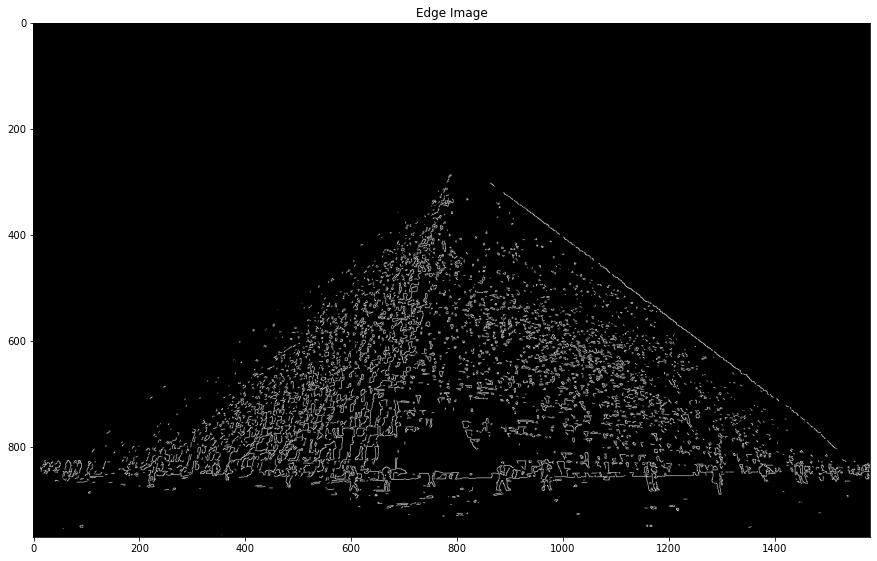

In [34]:
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np


input_dir = './input/'
in_img_name = 'Kheops-Pyramid.jpeg'
in_img = cv.imread(input_dir + in_img_name, cv.IMREAD_GRAYSCALE)
canny_thresholds = [300, 400]
edges = cv.Canny(in_img, canny_thresholds[0], canny_thresholds[1])
plt.figure(figsize=(15,10))
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()

In [35]:
# Hough Line Transform
lines = cv.HoughLines(edges, 1, np.pi / 180, 250, None, 0, 0)

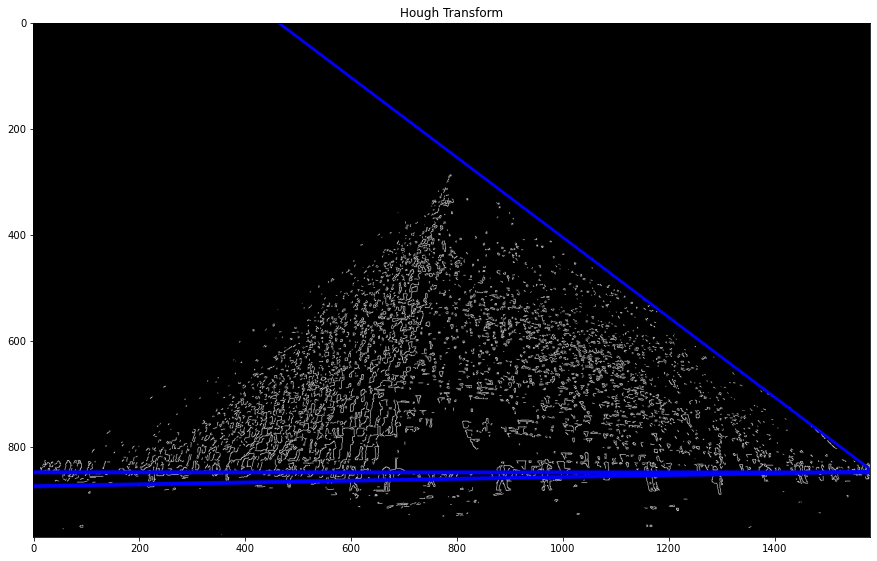

In [36]:
output = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
w,h = in_img.shape
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 3000*(-b)), int(y0 + 3000*(a)))
        pt2 = (int(x0 - 3000*(-b)), int(y0 - 3000*(a)))
        cv.line(output, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

plt.figure(figsize=(15,10))
plt.imshow(output)
plt.title('Hough Transform')
plt.show()